# Tensorflow Lab

z = 5x - 3y + 7

## Task:

Given the previous equation:
- Generate 10 random values for `x` and `y` as input with max. value = 100.
- Generate z for the above values.
- Create a model with 2 inputs to accept x and y and predicts z.
- You must show the results:
    - Model summary.
    - Loss AND ACC. VS epochs.
    - Weights.
    - Predict output for 3 diffrent inputs.

## Cariteria:

- Model must be 1 neuron only.
- Acc. must be 90% at least.

In [57]:
import tensorflow as tf
import numpy as np
import time
print (tf.version.VERSION)
print (tf.__version__)

2.2.0
2.2.0


In [2]:

x = np.random.uniform(low=0, high=100, size=(10,))
y = np.random.uniform(low=0, high=100, size=(10,))
z = (5*x) - (3*y )+7
print("x :" , x)
print("y :" , y)
print("z :" ,z)

x : [78.08017949 63.38180372 47.99215827 92.68791078 53.04110021 30.3496856
 81.22820391 84.42600543 55.33850732 88.1219672 ]
y : [47.31149036 65.19346692 76.80107537 20.27606113 30.42585741 64.06789684
 88.28072745 73.81951573 52.84074966 78.15388924]
z : [255.46642634 128.32861783  16.55756525 409.61137054 180.92792883
 -33.4552625  148.29883717 207.67147994 125.17028765 213.14816828]


In [7]:
inputs = list(zip(x, y))
inputs = np.array(inputs,  dtype=float)

print(inputs)

[[78.08017949 47.31149036]
 [63.38180372 65.19346692]
 [47.99215827 76.80107537]
 [92.68791078 20.27606113]
 [53.04110021 30.42585741]
 [30.3496856  64.06789684]
 [81.22820391 88.28072745]
 [84.42600543 73.81951573]
 [55.33850732 52.84074966]
 [88.1219672  78.15388924]]


In [36]:
x_valid = np.random.uniform(low=0, high=100, size=(10,))
y_valid = np.random.uniform(low=0, high=100, size=(10,))
z_valid = (5*x_valid) - (3*y_valid )+7
print("x :" , x_valid)
print("y :" , y_valid)
print("z :" ,z_valid)
inputs_valid = list(zip(x_valid, y_valid))
inputs_valid = np.array(inputs_valid,  dtype=float)

print(inputs_valid)

x : [83.41816494 64.15694268 46.73077939 97.64620125 50.18755325 77.40079916
 56.21521822 93.61645672 24.83348189 88.45384709]
y : [5.56011999e+01 3.69584060e+01 5.51179088e-02 3.23971019e+01
 2.64342295e+01 2.20232857e+01 4.80731626e+01 3.98066343e+01
 8.62533474e+01 4.67034537e+01]
z : [ 257.28722499  216.90949551  240.48854323  398.03970052  178.63507776
  327.93413864  143.85660316  355.66238074 -127.59263284  309.15887423]
[[8.34181649e+01 5.56011999e+01]
 [6.41569427e+01 3.69584060e+01]
 [4.67307794e+01 5.51179088e-02]
 [9.76462013e+01 3.23971019e+01]
 [5.01875532e+01 2.64342295e+01]
 [7.74007992e+01 2.20232857e+01]
 [5.62152182e+01 4.80731626e+01]
 [9.36164567e+01 3.98066343e+01]
 [2.48334819e+01 8.62533474e+01]
 [8.84538471e+01 4.67034537e+01]]


In [37]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[2])
)

In [46]:
model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.1),
        metrics=["mean_squared_error"]
    )

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [48]:
tf.keras.utils.plot_model(
        model,
        to_file='Files/model.png',
        show_layer_names=True,
        show_shapes=True
    )

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [49]:
t = time.time()
#hist = model.fit(inputs, z, epochs=1000, verbose=0)
hist =model.fit(inputs, z, validation_data=(inputs_valid,z_valid), epochs=1000, batch_size=1000)
print (str.format("Training took: {:0.2f} Sec", time.time() - t))

 7.6670e-07 - mean_squared_error: 7.6670e-07 - val_loss: 1.1988e-06 - val_mean_squared_error: 1.1988e-06
Epoch 890/1000
1/1 [==============================] - 0s 20ms/step - loss: 7.4701e-07 - mean_squared_error: 7.4701e-07 - val_loss: 1.2101e-06 - val_mean_squared_error: 1.2101e-06
Epoch 891/1000
1/1 [==============================] - 0s 17ms/step - loss: 7.4532e-07 - mean_squared_error: 7.4532e-07 - val_loss: 1.1660e-06 - val_mean_squared_error: 1.1660e-06
Epoch 892/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.3370e-07 - mean_squared_error: 7.3370e-07 - val_loss: 1.1512e-06 - val_mean_squared_error: 1.1512e-06
Epoch 893/1000
1/1 [==============================] - 0s 28ms/step - loss: 7.3425e-07 - mean_squared_error: 7.3425e-07 - val_loss: 1.1117e-06 - val_mean_squared_error: 1.1117e-06
Epoch 894/1000
1/1 [==============================] - 0s 20ms/step - loss: 7.2476e-07 - mean_squared_error: 7.2476e-07 - val_loss: 1.1311e-06 - val_mean_squared_error: 1.1311e-06


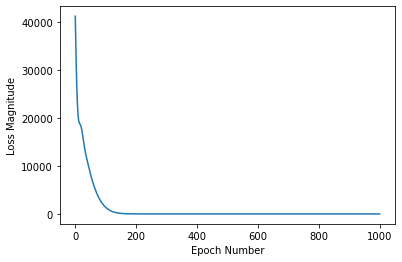

In [24]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss']);

In [50]:
model.get_weights()

[array([[ 4.9999857],
        [-3.000012 ]], dtype=float32),
 array([7.0017557], dtype=float32)]

In [51]:
model.save('models/c_to_f')

INFO:tensorflow:Assets written to: models/c_to_f/assets


In [52]:
model.save('models/c_to_f.h5')

In [53]:
predictions = model.predict(inputs_valid)


In [54]:
print(predictions)

[[ 257.28714]
 [ 216.90991]
 [ 240.48961]
 [ 398.03967]
 [ 178.63579]
 [ 327.93457]
 [ 143.85698]
 [ 355.66232]
 [-127.59227]
 [ 309.1588 ]]


In [60]:
from tensorflow.keras import backend as K
K.clear_session()